# Working with data and numpy
By: Doug Rennehan (TA)

In the **/data/** folder there is a file called **formation_times.txt**.  This single column of data gives the formation times (in billions of years, or $\mathrm{Gyr}$) of stars in a simulation of an isolated galaxy. Let's investigate the distribution of formation times, and determine the star formation rate of the system. 

For now, we assume that each "star" is $M_* = 2\times10^5 \, \mathrm{M}_\odot$, where $\mathrm{M}_\odot$ is the mass of the Sun ($\mathrm{M}_\odot \approx 2\times10^{33}$ g).

The simulation begins at $t = 0 \, \mathrm{Gyr}$, and stops at $t = 2.5 \, \mathrm{Gyr}$.

### Loading the data

First, we need to load the data. The data file location is **data/formation_times.txt**. Use the **numpy** package, and the function **loadtxt** to load the data into a variable called **data**.

In [1]:
import numpy as np

data = np.loadtxt('data/formation_times.txt')

### First investigations

Print out the shape of the **data** array.

In [2]:
data.shape

(31824,)

What are some of the common statistics on this data? Well, we could look at the mean, median, and standard deviation to start. Print out the mean, median, and standard deviations of the data using **numpy**.

In [3]:
mean = np.mean(data)
median = np.median(data)
std = np.std(data)

print('Mean formation time: %g Gyr' % mean)
print('Median formation time: %g Gyr' % median)
print('Standard deviation: %g Gyr' % std)

Mean formation time: 1.06337 Gyr
Median formation time: 0.965881 Gyr
Standard deviation: 0.697806 Gyr


#### Can you infer something about the star formation times of the simulation using these statistics, given that the simulation stops at $t = 2.5 \, \mathrm{Gyr}$?

#### Answer:
At first glance, from the above values (considering the simulation stops at $t = 2.5 \, \mathrm{Gyr}$) it seems that the star formation rate is relatively constant over the course of the simulation.  We infer this from the mean location at about half-way between the start and end times.  It does seem to be a bit biased toward the beginning of the simulation.

### Histograms

Print out a histogram of the star formation time data with the default number of bins, using **numpy**.

In [4]:
hist = np.histogram(data)
hist

(array([4086, 4998, 3520, 3791, 3302, 2975, 2616, 2278, 2141, 2117]),
 array([  3.05000000e-04,   2.50274500e-01,   5.00244000e-01,
          7.50213500e-01,   1.00018300e+00,   1.25015250e+00,
          1.50012200e+00,   1.75009150e+00,   2.00006100e+00,
          2.25003050e+00,   2.50000000e+00]))

Print out a histogram of the data with $N = 50$ bins.

In [5]:
hist = np.histogram(data, bins = 50)
hist

(array([ 564,  892,  856,  843,  931,  826, 1017, 1025, 1071, 1059,  723,
         758,  750,  719,  570,  826,  848,  672,  732,  713,  612,  659,
         647,  706,  678,  474,  608,  667,  669,  557,  540,  501,  528,
         544,  503,  523,  464,  567,  401,  323,  421,  447,  396,  429,
         448,  443,  396,  479,  369,  430]),
 array([  3.05000000e-04,   5.02989000e-02,   1.00292800e-01,
          1.50286700e-01,   2.00280600e-01,   2.50274500e-01,
          3.00268400e-01,   3.50262300e-01,   4.00256200e-01,
          4.50250100e-01,   5.00244000e-01,   5.50237900e-01,
          6.00231800e-01,   6.50225700e-01,   7.00219600e-01,
          7.50213500e-01,   8.00207400e-01,   8.50201300e-01,
          9.00195200e-01,   9.50189100e-01,   1.00018300e+00,
          1.05017690e+00,   1.10017080e+00,   1.15016470e+00,
          1.20015860e+00,   1.25015250e+00,   1.30014640e+00,
          1.35014030e+00,   1.40013420e+00,   1.45012810e+00,
          1.50012200e+00,   1.55011590

Use *tuple unpacking* to expand the histogram data into two variables: **counts** and **bin_edges**. Print these to the console.

In [6]:
counts, bin_edges = np.histogram(data, bins = 50)
print(counts)
print(bin_edges)

[ 564  892  856  843  931  826 1017 1025 1071 1059  723  758  750  719  570
  826  848  672  732  713  612  659  647  706  678  474  608  667  669  557
  540  501  528  544  503  523  464  567  401  323  421  447  396  429  448
  443  396  479  369  430]
[  3.05000000e-04   5.02989000e-02   1.00292800e-01   1.50286700e-01
   2.00280600e-01   2.50274500e-01   3.00268400e-01   3.50262300e-01
   4.00256200e-01   4.50250100e-01   5.00244000e-01   5.50237900e-01
   6.00231800e-01   6.50225700e-01   7.00219600e-01   7.50213500e-01
   8.00207400e-01   8.50201300e-01   9.00195200e-01   9.50189100e-01
   1.00018300e+00   1.05017690e+00   1.10017080e+00   1.15016470e+00
   1.20015860e+00   1.25015250e+00   1.30014640e+00   1.35014030e+00
   1.40013420e+00   1.45012810e+00   1.50012200e+00   1.55011590e+00
   1.60010980e+00   1.65010370e+00   1.70009760e+00   1.75009150e+00
   1.80008540e+00   1.85007930e+00   1.90007320e+00   1.95006710e+00
   2.00006100e+00   2.05005490e+00   2.10004880e+00   2

Compare the lengths of both **counts** and **bin_edges** by printing out their lengths to the console.

In [7]:
print('counts length: %d' % len(counts))
print('bin_edges length: %d' % len(bin_edges))

counts length: 50
bin_edges length: 51


Use numpy array slicing to create a new variable **bin_centers** that contains the bin centers rather than the bin edges.

In [8]:
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
bin_centers

array([ 0.02530195,  0.07529585,  0.12528975,  0.17528365,  0.22527755,
        0.27527145,  0.32526535,  0.37525925,  0.42525315,  0.47524705,
        0.52524095,  0.57523485,  0.62522875,  0.67522265,  0.72521655,
        0.77521045,  0.82520435,  0.87519825,  0.92519215,  0.97518605,
        1.02517995,  1.07517385,  1.12516775,  1.17516165,  1.22515555,
        1.27514945,  1.32514335,  1.37513725,  1.42513115,  1.47512505,
        1.52511895,  1.57511285,  1.62510675,  1.67510065,  1.72509455,
        1.77508845,  1.82508235,  1.87507625,  1.92507015,  1.97506405,
        2.02505795,  2.07505185,  2.12504575,  2.17503965,  2.22503355,
        2.27502745,  2.32502135,  2.37501525,  2.42500915,  2.47500305])

Print out the *second* to the *last* element of **bin_edges**.

In [9]:
bin_edges[1:]

array([ 0.0502989,  0.1002928,  0.1502867,  0.2002806,  0.2502745,
        0.3002684,  0.3502623,  0.4002562,  0.4502501,  0.500244 ,
        0.5502379,  0.6002318,  0.6502257,  0.7002196,  0.7502135,
        0.8002074,  0.8502013,  0.9001952,  0.9501891,  1.000183 ,
        1.0501769,  1.1001708,  1.1501647,  1.2001586,  1.2501525,
        1.3001464,  1.3501403,  1.4001342,  1.4501281,  1.500122 ,
        1.5501159,  1.6001098,  1.6501037,  1.7000976,  1.7500915,
        1.8000854,  1.8500793,  1.9000732,  1.9500671,  2.000061 ,
        2.0500549,  2.1000488,  2.1500427,  2.2000366,  2.2500305,
        2.3000244,  2.3500183,  2.4000122,  2.4500061,  2.5      ])

Print out the *first* to the *penultimate* element of **bin_edges**.

In [10]:
bin_edges[:-1]

array([  3.05000000e-04,   5.02989000e-02,   1.00292800e-01,
         1.50286700e-01,   2.00280600e-01,   2.50274500e-01,
         3.00268400e-01,   3.50262300e-01,   4.00256200e-01,
         4.50250100e-01,   5.00244000e-01,   5.50237900e-01,
         6.00231800e-01,   6.50225700e-01,   7.00219600e-01,
         7.50213500e-01,   8.00207400e-01,   8.50201300e-01,
         9.00195200e-01,   9.50189100e-01,   1.00018300e+00,
         1.05017690e+00,   1.10017080e+00,   1.15016470e+00,
         1.20015860e+00,   1.25015250e+00,   1.30014640e+00,
         1.35014030e+00,   1.40013420e+00,   1.45012810e+00,
         1.50012200e+00,   1.55011590e+00,   1.60010980e+00,
         1.65010370e+00,   1.70009760e+00,   1.75009150e+00,
         1.80008540e+00,   1.85007930e+00,   1.90007320e+00,
         1.95006710e+00,   2.00006100e+00,   2.05005490e+00,
         2.10004880e+00,   2.15004270e+00,   2.20003660e+00,
         2.25003050e+00,   2.30002440e+00,   2.35001830e+00,
         2.40001220e+00,

### Plotting the data

We are interested in plotting the number of stars formed in each formation bin. Use **matplotlib.pyplot** and the **plot** function to accomplish this, and be sure to use a title, and axes labels. The x-axis should be limited in the range $x \in [0, 2.5]$. Make sure the units are given in the axes labels.

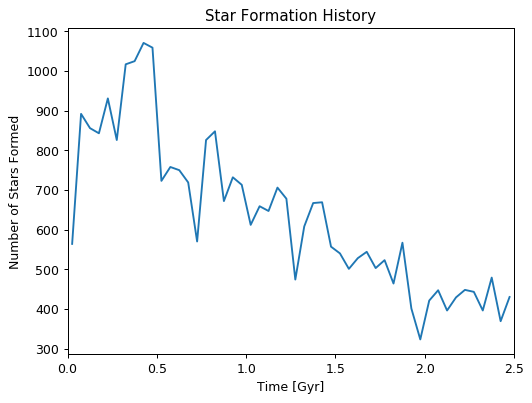

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6.4, 4.8), dpi = 90)  # Standard figure options
plt.title('Star Formation History')
plt.ylabel('Number of Stars Formed')
plt.xlabel('Time [Gyr]')
plt.xlim([0, 2.5])
plt.plot(bin_centers, counts)
plt.show()
plt.close()

Plot the mean and median on top of the previous plot using **axvline**. The mean should have a dashed line-style, and the median should have a dotted line-style.

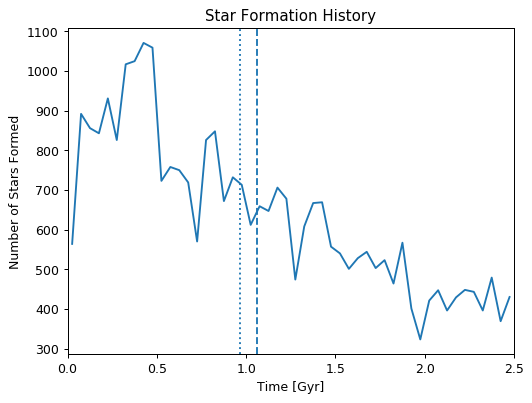

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6.4, 4.8), dpi = 90)  # Standard figure options
plt.title('Star Formation History')
plt.ylabel('Number of Stars Formed')
plt.xlabel('Time [Gyr]')
plt.xlim([0, 2.5])
plt.axvline(np.mean(data), ls = '--')  # Mean plot
plt.axvline(np.median(data), ls = ':')  # Median plot
plt.plot(bin_centers, counts)
plt.show()
plt.close()

### Star Formation Rate

Given that each star has a mass of $M_* = 2\times10^5 \, \mathrm{M}_\odot$, plot the mass of stars formed, in $\mathrm{M}_\odot$ units, binned by time formed. Be sure to update the axes labels and units, and make the y-axis log scaled.

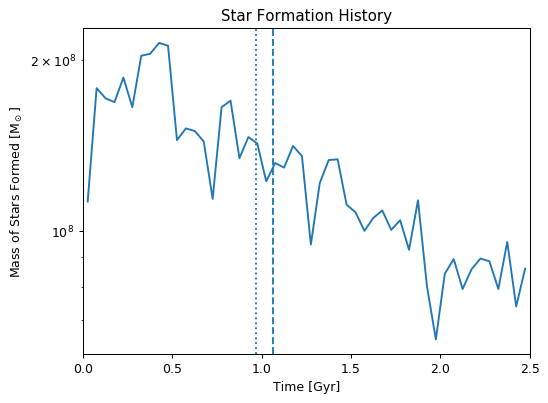

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6.4, 4.8), dpi = 90)  # Standard figure options
plt.title('Star Formation History')
plt.yscale('log')
plt.ylabel('Mass of Stars Formed [M$_\odot$]')
plt.xlabel('Time [Gyr]')
plt.xlim([0, 2.5])
plt.axvline(np.mean(data), ls = '--')  # Mean plot
plt.axvline(np.median(data), ls = ':')  # Median plot
plt.plot(bin_centers, counts * 2e5)  # 2e5 to convert to Msun
plt.show()
plt.close()

We can find the difference in time between each bin, depending on our choice of number of bins. What is the "$\Delta t$" of each bin, in the case of $N = 50$? Print it out to the console.

In [14]:
print('dt: %g Gyr' % float(2.5 / 50))  # 2.5 Gyr over 50 bins

dt: 0.05 Gyr


Given your $\Delta t$, create a *star formation rate* array **sfr**. Using this array, print the mean star formation rate, in $\mathrm{M}_\odot / \mathrm{yr}$ (not per $\mathrm{Gyr}$!).

In [15]:
sfr = counts * 2e5 / (2.5 / 50)  # masses / dt (in Gyr)
sfr /= 1e9  # Convert to per year instead of per Gyr

print('Mean SFR: %g Msun/yr' % np.mean(sfr))

Mean SFR: 2.54592 Msun/yr


Finally, plot the star formation rate (in $\mathrm{M}_\odot / \mathrm{yr}$) as a function of the time formed.

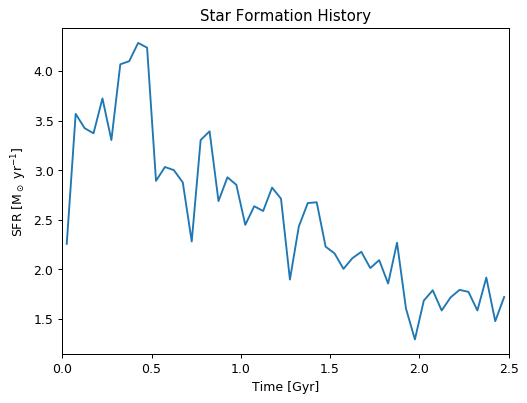

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6.4, 4.8), dpi = 90)  # Standard figure options
plt.title('Star Formation History')
plt.ylabel('SFR [M$_\odot$ yr$^{-1}$]')
plt.xlabel('Time [Gyr]')
plt.xlim([0, 2.5])
plt.plot(bin_centers, sfr) 
plt.show()
plt.close()

Fit an decaying exponential to the data using **scipy.optimize.curve_fit**, with a functional form $ R = ae^{-bt} $. You will have to make a reasonable guess for $a$ and $b$. *Hint:* Use $a_\mathrm{guess} = 3$ and $b_\mathrm{guess} = -0.1$.

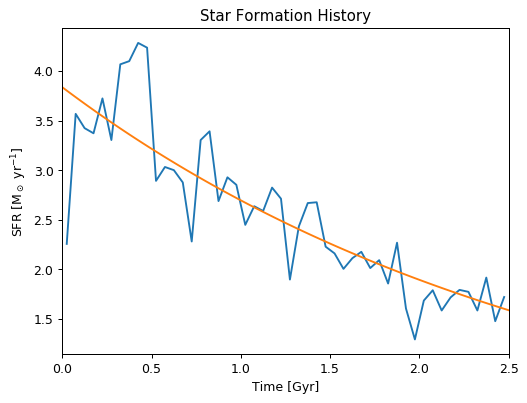

In [28]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fitted_data = curve_fit(lambda t,a,b: a*np.exp(-b*t),  bin_centers,  sfr,  p0=(3, -0.1))

new_x = np.linspace(0, 2.5, 100)
new_func = fitted_data[0][0] * np.exp(-fitted_data[0][1] * new_x)

plt.figure(figsize = (6.4, 4.8), dpi = 90)  # Standard figure options
plt.title('Star Formation History')
plt.ylabel('SFR [M$_\odot$ yr$^{-1}$]')
plt.xlabel('Time [Gyr]')
plt.xlim([0, 2.5])
plt.plot(bin_centers, sfr) 
plt.plot(new_x, new_func)
plt.show()
plt.close()

What is the characteristic decay timescale in $\mathrm{Gyr}$?

In [27]:
print('%.2f Gyr' % (float(1 / fitted_data[0][1])))

2.83 Gyr
